Shape of X: (60000, 784)
Shape of y: (60000,)


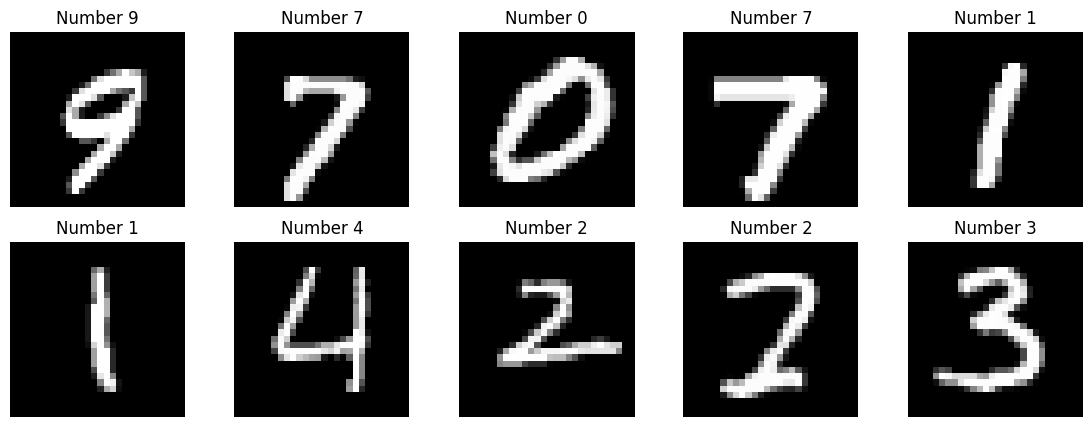

In [1]:
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = load_data()

# Show 10 randoms numbers.
j = 1
plt.figure(figsize=(14, 5))
for i in np.random.randint(low=0, high=len(X_train), size=[10]):
    plt.subplot(2, 5, j)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Number ' + str(y_train[i]))
    j += 1

# Reshape
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

#### The Multilayer Perceptron model is a sequence of Perceptron layers whose input is the output of the previous layer.
#### Keras makes it very easy to implement multi-layer neural networks:

In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation=None))
# Optimizer
optimizer = tf.keras.optimizers.Adam(1e-1)

# Compilation (specify the loss function)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 524us/step - loss: 21.4991
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - loss: 8.3396
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - loss: 8.4449
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - loss: 8.3909
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - loss: 8.3770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - loss: 8.4133
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - loss: 8.3258
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - loss: 8.4053
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - loss: 8.4136
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 8.3599


In [8]:
import tensorflow as tf

# Sequential
model = tf.keras.Sequential()
# Hidden layer 1
model.add(Dense(128, activation='relu', input_shape=[28*28]))  # images are 28*28
# Output Layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train,                  # Training dataset
                    epochs=20,                         # Number of epochs
                    batch_size=64,                     # Len of batch
                    validation_data=(X_test, y_test))  # Validation dataset

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8241 - loss: 9.3829 - val_accuracy: 0.8981 - val_loss: 0.6590
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9116 - loss: 0.5033 - val_accuracy: 0.9204 - val_loss: 0.4262
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9331 - loss: 0.2874 - val_accuracy: 0.9322 - val_loss: 0.3685
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9430 - loss: 0.2328 - val_accuracy: 0.9389 - val_loss: 0.3116
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9493 - loss: 0.1957 - val_accuracy: 0.9476 - val_loss: 0.2719
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9548 - loss: 0.1711 - val_accuracy: 0.9477 - val_loss: 0.2523
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9576 - loss: 0.1579 - val_accuracy: 0.9437 - val_loss: 0.2679
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9579 - loss: 0.1652 - val_accuracy: 0.

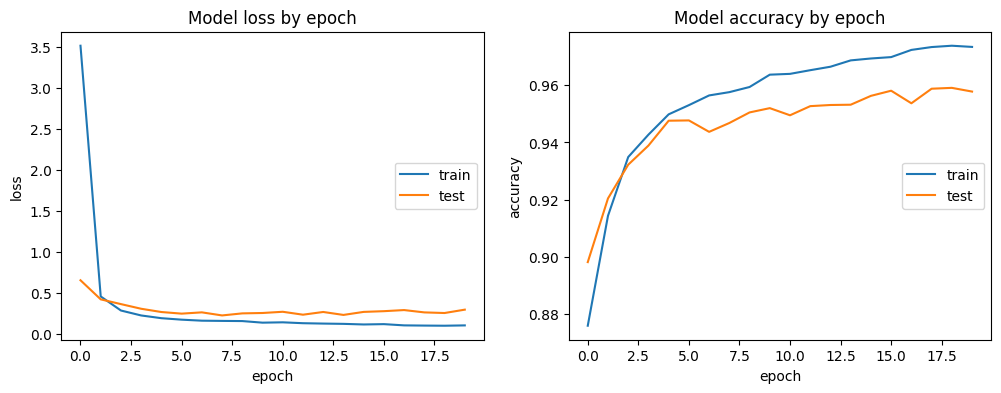

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))

# X: Number of rows in the subplot grid.
# Y: Number of columns in the subplot grid.
# Z: Position of the current subplot (starting from 1).

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')


plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [16]:
# Optionally, print training and validation accuracy from the history
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy

print(f"Training Accuracy (from history): {train_accuracy:.4f}")
print(f"Validation Accuracy (from history): {val_accuracy:.4f}")

Training Accuracy (from history): 0.9734
Validation Accuracy (from history): 0.9578


#### You can find all the functionalities of Keras in `tensorflow.keras`. 
#### You can find in particular the "layers of neurons" in `tensorflow.keras.layers`:
| Definition              | Function              |
|------------------------ |-----------------------|
| Dense layer             | Dense                 |
| Convolution 2D          | Conv2D                |
| Dropout                 | Dropout               |
| Batch Normalization     | BatchNormalization    |
| Average Pooling 2D      | AveragePooling2D      |
| Flatten                 | Flatten               |
| RNN                     | RNN                   |
| LSTM                    | LSTM                  |
| GRU                     | GRU                   |
